<a href="https://colab.research.google.com/github/sultanbst123/Sales-prediction/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data modelling with Python

## Library & File

In [ ]:

!pip install catboost
!pip install optuna
!pip install borutashap

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDOneClassSVM
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,f1_score, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay


import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Sales/train_Sales(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Sales/test._Sales(clean).csv")

In [ ]:
train.head()

,Item_Type,Outlet_ID,Outlet_Size,Outlet_Location_Type,Sales,Item,ID,year_bins,new1,new2,new3,new4,new5,new6,new7,new8
0,Baking Goods,OUT046,Small,Tier 2,2689.457781,FDU,32,>2000,15.879006,21.204921,10.179634,16.628159,159.590806,201.117336,107.615406,164.948186
1,Meat,OUT035,Small,Tier 1,3437.350375,NCT,54,<2000,15.205801,21.102371,10.418947,14.650943,173.073708,211.019489,132.130501,174.572421
2,Drinks,OUT035,Small,Tier 3,3129.967268,FDW,8,<2000,20.882263,20.882263,20.882263,20.882263,205.465010,205.465010,205.465010,205.465010
3,Foods,OUT046,Small,Tier 1,1306.514376,FDJ,22,<2000,14.920165,21.050435,9.687333,14.091051,165.606969,253.417583,116.385376,135.846100
4,Baking Goods,OUT035,Small,Tier 3,1739.769829,FDF,47,<2000,17.005906,21.247876,9.939553,19.830290,175.994620,240.871039,137.806524,149.306296


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Type             87864 non-null  object 
 1   Outlet_ID             87864 non-null  object 
 2   Outlet_Size           87864 non-null  object 
 3   Outlet_Location_Type  87864 non-null  object 
 4   Sales                 87864 non-null  float64
 5   Item                  87864 non-null  object 
 6   ID                    87864 non-null  int64  
 7   year_bins             87864 non-null  object 
 8   new1                  87864 non-null  float64
 9   new2                  87864 non-null  float64
 10  new3                  87864 non-null  float64
 11  new4                  87864 non-null  float64
 12  new5                  87864 non-null  float64
 13  new6                  87864 non-null  float64
 14  new7                  87864 non-null  float64
 15  new8               

## Split data

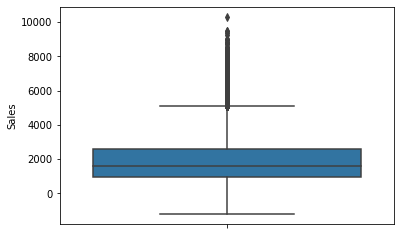

In [ ]:
sns.boxplot(y=train.Sales)

In [ ]:
train.shape

(84860, 16)

In [ ]:
# drop outlier values of sales 

train = train.query("Sales > 0 and Sales < 5000")

In [ ]:
x = train.drop("Sales", axis=1) 
y = train.Sales

In [ ]:
# ubah object ke category

cater = x.select_dtypes("object").columns

In [ ]:
x[cater] = x[cater].astype("category")

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2,random_state=18)

In [ ]:
#coba dengan lgbm 

lg = LGBMRegressor(random_state=277)
lg.fit(x_train, y_train)

LGBMRegressor(random_state=277)

Split 80:20

In [ ]:
print(f"r2_score train: {lg.score(x_train, y_train)}") 
print(f"r2_score validation: {lg.score(x_val, y_val)}")

r2_score train: 0.08241321394215595
r2_score validation: 0.004731674572785893


In [ ]:
pred = lg.predict(x_val)

In [ ]:
mean_squared_error(y_val, pred, squared=False)

1103.894405281485

In [ ]:
mean_absolute_error(y_val, pred)

896.629936560997

Split 90:10

In [ ]:
print(f"r2_score train: {lg.score(x_train, y_train)}") 
print(f"r2_score validation: {lg.score(x_val, y_val)}")

r2_score train: 0.07395017164011586
r2_score validation: 0.0036185057591295866


In [ ]:
pred = lg.predict(x_val)

In [ ]:
mean_squared_error(y_val, pred, squared=False)

1106.1815445835223

In [ ]:
mean_absolute_error(y_val, pred)

898.808723296699

## Feature Selections with borutashap & LGBM

In [ ]:
fs = BorutaShap(model=lg,
                importance_measure="shap",
                classification = False)

In [ ]:
fs.fit(X=x_train, y=y_train, n_trials=10,random_state=0)

  0%|          | 0/10 [00:00<?, ?it/s]

1 attributes confirmed important: ['Outlet_ID']
13 attributes confirmed unimportant: ['Outlet_Location_Type', 'year_bins', 'new3', 'new8', 'new2', 'new4', 'new5', 'new7', 'Item_Type', 'new6', 'new1', 'Outlet_Size', 'ID']
1 tentative attributes remains: ['Item']


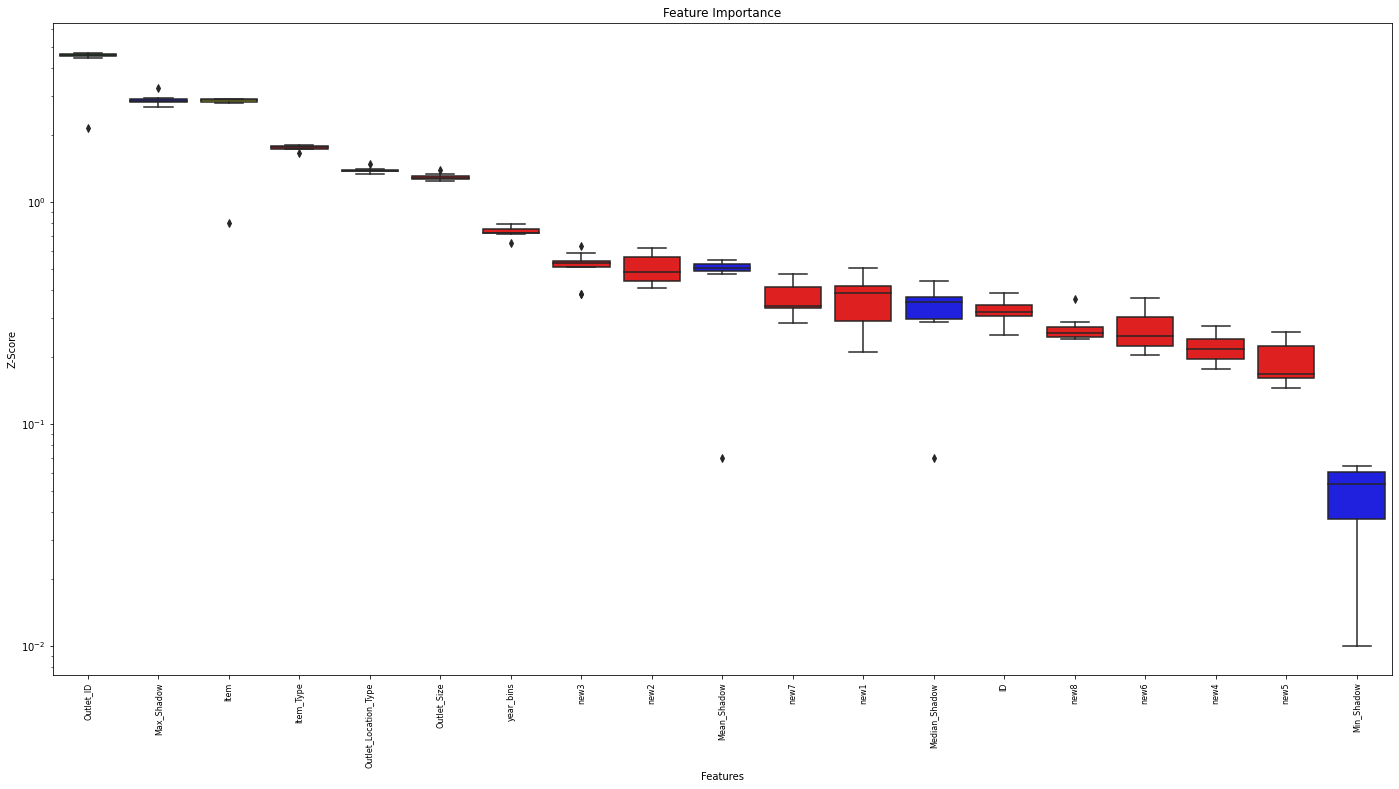

In [ ]:
fs.plot(which_features='all', figsize=(24,12))

In [ ]:
col = fs.Subset().columns.to_list()
col

['Outlet_ID']

In [ ]:
def rmse(y_val, y_pred): 
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

def mae(y_val, y_pred): 
    mae = mean_absolute_error(y_val, y_pred)
    return mae

## Model - 1

In [ ]:
x_train_1 = x_train[col]
x_val_1 = x_val[col]

In [ ]:
x_train_1.head()

,Outlet_ID
76630,OUT035
34489,OUT018
32045,OUT035
51371,OUT046
86532,OUT049


In [ ]:
le = {}
for i in x_train_1:
    le[i] = LabelEncoder()
    x_train_1[i] = le[i].fit_transform(x_train_1[i]) 
    x_val_1[i] = le[i].transform(x_val_1[i])

In [ ]:
XGB = XGBRegressor(random_state=10)
GBT = GradientBoostingRegressor(random_state=20)
HGBT = HistGradientBoostingRegressor(random_state=30)
ADA = AdaBoostRegressor(random_state=40)
EXT = ExtraTreeRegressor(random_state=50)
RF = RandomForestRegressor(random_state=60)
DT = DecisionTreeRegressor(random_state=70)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)

    #error
    pred = model.predict(x_val)
    rmse_error.append(rmse(y_val,pred)) 
    mae_error.append(mae(y_val,pred)) 
    
    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    print(30*"-")
    print(i)
    score_1(i, x_train_1, y_train, x_val_1, y_val)
    print(10*"->" + " DONE")

------------------------------
XGBRegressor(random_state=10)
[07:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
->->->->->->->->->-> DONE
------------------------------
AdaBoostRegressor(random_state=40)
->->->->->->->->->-> DONE
------------------------------
GradientBoostingRegressor(random_state=20)
->->->->->->->->->-> DONE
------------------------------
HistGradientBoostingRegressor(random_state=30)
->->->->->->->->->-> DONE
------------------------------
DecisionTreeRegressor(random_state=70)
->->->->->->->->->-> DONE
------------------------------
RandomForestRegressor(random_state=60)
->->->->->->->->->-> DONE
------------------------------
ExtraTreeRegressor(random_state=50)
->->->->->->->->->-> DONE


## Model - 2

In [ ]:
x_train_2 = x_train[col]
x_val_2 = x_val[col]

In [ ]:
x_train_2.dtypes

Outlet_ID    category
dtype: object

In [ ]:
CB = CatBoostRegressor(random_state=12)
LGBM = LGBMRegressor(random_state=14)

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)

       #error
       pred = model.predict(x_val)
       rmse_error.append(rmse(y_val,pred))
       mae_error.append(mae(y_val,pred))
    
 
   #catboost
    else:         
       #fit model    
       model.fit(x_train,y_train,cat_features=["Outlet_ID"],verbose=False)

       #error
       pred = model.predict(x_val)
       rmse_error.append(rmse(y_val,pred))
       mae_error.append(mae(y_val,pred))
    
    return model

In [ ]:
for i in [CB,LGBM]:
    print(30*"-")
    print(i)
    score_2(i, x_train_2, y_train, x_val_2, y_val)
    print(10*"->" + " DONE")

------------------------------
->->->->->->->->->-> DONE
------------------------------
LGBMRegressor(random_state=14)
->->->->->->->->->-> DONE


## Model - 3

In [ ]:
x_train_3 = x_train[col]
x_val_3 = x_val[col]

In [ ]:
x_train_3

,Outlet_ID
76630,OUT035
34489,OUT018
32045,OUT035
51371,OUT046
86532,OUT049
...,...
73348,OUT046
50809,OUT035
1784,OUT035
36895,OUT035


In [ ]:
x_train_3 = pd.get_dummies(x_train_3) 
x_val_3 = pd.get_dummies(x_val_3)

In [ ]:
x_train_3

,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049
76630,0,0,1,0,0
34489,0,1,0,0,0
32045,0,0,1,0,0
51371,0,0,0,1,0
86532,0,0,0,0,1
...,...,...,...,...,...
73348,0,0,0,1,0
50809,0,0,1,0,0
1784,0,0,1,0,0
36895,0,0,1,0,0


In [ ]:
LR = LinearRegression() 
KNN = KNeighborsRegressor()
#SVM = SVR(kernel="linear")
ELT = ElasticNet(random_state=145) #l1_l2
LASSO = Lasso(random_state=156) #L1
RIDGE = Ridge(random_state=1467) # L2

In [ ]:
def score_3(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)

    #error
    pred = model.predict(x_val)
    rmse_error.append(rmse(y_val,pred)) 
    mae_error.append(mae(y_val,pred)) 
    
    return model

In [ ]:
for i in [LR,KNN,ELT,LASSO,RIDGE]:
    print(30*"-")
    print(i)
    score_3(i, x_train_3, y_train, x_val_3, y_val)
    print(10*"->" + " DONE")

------------------------------
LinearRegression()
->->->->->->->->->-> DONE
------------------------------
KNeighborsRegressor()
->->->->->->->->->-> DONE
------------------------------
ElasticNet(random_state=145)
->->->->->->->->->-> DONE
------------------------------
Lasso(random_state=156)
->->->->->->->->->-> DONE
------------------------------
Ridge(random_state=1467)
->->->->->->->->->-> DONE


## Model - Selections

In [ ]:
all_models = pd.DataFrame({"models": ["XGB", "ADA", "GBT", "HGBT", "DT", "RF", "EXT","CB","LGBM","LR","KNN","ELT","LASSO","RIDGE"], 
                          "RMSE": rmse_error, 
                          "MAE": mae_error})

In [ ]:
all_models

,models,RMSE,MAE
0,XGB,1101.229310,894.658516
1,ADA,1106.924589,915.697371
2,GBT,1101.229559,894.666441
3,HGBT,1101.247639,894.477257
4,DT,1101.229558,894.666427
5,RF,1101.215053,894.625687
6,EXT,1101.229558,894.666427
7,CB,1101.237748,894.622422
8,LGBM,1101.229559,894.666441
9,LR,1101.227537,894.663280


In [ ]:
# RMSE 
all_models[["models", "RMSE"]].sort_values("RMSE")

,models,RMSE
5,RF,1101.215053
9,LR,1101.227537
0,XGB,1101.229310
4,DT,1101.229558
6,EXT,1101.229558
2,GBT,1101.229559
8,LGBM,1101.229559
13,RIDGE,1101.229561
7,CB,1101.237748
3,HGBT,1101.247639


In [ ]:
#MAE
all_models[["models", "MAE"]].sort_values("MAE")

,models,MAE
11,SVC,874.594775
3,HGBT,894.477257
7,CB,894.622422
5,RF,894.625687
0,XGB,894.658516
9,LR,894.663280
4,DT,894.666427
6,EXT,894.666427
2,GBT,894.666441
8,LGBM,894.666441


## Hyperparameters - tuning

### LGBM

In [ ]:
#lgbm

def objective(trial):
    params = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        'objective': trial.suggest_categorical('objective',['regression','rmse']),#'multiclass','binary']),  
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1),
    }
    model = LGBMRegressor(**params)  
    model.fit(x_train_2,y_train,eval_set=[(x_val_2,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict(x_val_2)   
    error = rmse(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2021-11-07 07:13:03,323] A new study created in memory with name: no-name-ed67ae31-0f1b-4179-8c1b-a43c95f4ea13
[I 2021-11-07 07:13:04,218] Trial 0 finished with value: 1101.1593291180288 and parameters: {'objective': 'regression', 'n_estimators': 10000, 'learning_rate': 0.285960722517663, 'num_leaves': 260, 'max_depth': 11, 'min_data_in_leaf': 600, 'lambda_l1': 45, 'lambda_l2': 55, 'min_gain_to_split': 4.550594123262503, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 1101.1593291180288.
[I 2021-11-07 07:13:05,132] Trial 1 finished with value: 1101.1800269724836 and parameters: {'objective': 'rmse', 'n_estimators': 10000, 'learning_rate': 0.17773891474696932, 'num_leaves': 1240, 'max_depth': 7, 'min_data_in_leaf': 4500, 'lambda_l1': 30, 'lambda_l2': 30, 'min_gain_to_split': 13.844262860707172, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value:

In [ ]:
lgbm_params = study.best_trial.params
lgbm_params

{'bagging_fraction': 0.2,
 'bagging_freq': 1,
 'feature_fraction': 0.9,
 'lambda_l1': 85,
 'lambda_l2': 95,
 'learning_rate': 0.2942070086237128,
 'max_depth': 3,
 'min_data_in_leaf': 2100,
 'min_gain_to_split': 2.171757907645677,
 'n_estimators': 10000,
 'num_leaves': 1480,
 'objective': 'rmse'}

### XGBOOST

In [ ]:

#xgboost

def objective(trial):
    
    params = {
        "tree_method": trial.suggest_categorical("tree_method",["gpu_hist"]), 
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),       
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators",200,2000,100),
        "gamma": trial.suggest_int("gamma", 0,5), 
        "eta": trial.suggest_loguniform("eta",1e-3,0.1),
        "reg_alpha": trial.suggest_int("reg_alpha",1,50),
        "reg_lambda": trial.suggest_int("reg_lambda",5,100),
        "max_depth": trial.suggest_int("max_depth",1,10),
    }
    model = XGBRegressor(**params)      
    model.fit(x_train_1,y_train,eval_set=[(x_val_1,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict(x_val_1)   
    error = rmse(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

In [ ]:
xgb_params = study.best_trial.params
xgb_params

{'alpha': 0.08453985163018055,
 'colsample_bytree': 0.9,
 'eta': 0.05548514671354318,
 'gamma': 0,
 'lambda': 0.0025040250556100404,
 'max_depth': 1,
 'min_child_weight': 228,
 'n_estimators': 1700,
 'reg_alpha': 34,
 'reg_lambda': 37,
 'subsample': 0.5}

## Cross - Validation

### RandomForest

In [ ]:
# Cross validation for random forest

rf_true = []

def cross_val(X, y, test, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params)
        alg.fit(x_train,y_train)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        #predict test
        y_test = alg.predict(test)
        rf_true.append(y_test) 
     
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
x_new = pd.concat([x_train_1, x_val_1]) 
y_new = pd.concat([y_train, y_val])

In [ ]:
tester = test[col]

In [ ]:
for i in x_train_1:
    tester[i] = le[i].transform(tester[i])

In [ ]:
rf_params = {"random_state": 42}

In [ ]:
rf_score = cross_val(x_new, y_new, tester, RandomForestRegressor, rf_params)

Fold: 1
 RMSE: 1113.7138363253018
--------------------------------------------------
Fold: 2
 RMSE: 1101.5999010335097
--------------------------------------------------
Fold: 3
 RMSE: 1105.1349790114957
--------------------------------------------------
Fold: 4
 RMSE: 1095.7740095179038
--------------------------------------------------
Fold: 5
 RMSE: 1100.369421221523
--------------------------------------------------
Fold: 6
 RMSE: 1092.6541414778883
--------------------------------------------------
Fold: 7
 RMSE: 1106.4285871141803
--------------------------------------------------

mean RMSE: 1102.2392679574002


In [ ]:

# for submission

rf_true

[array([1916.04324191, 1594.78647197, 1594.78647197, ..., 1787.69043294,
        1594.78647197, 1594.78647197]),
 array([1919.773738  , 1603.87300482, 1603.87300482, ..., 1791.75628144,
        1603.87300482, 1603.87300482]),
 array([1917.21464456, 1607.93777441, 1607.93777441, ..., 1790.89084043,
        1607.93777441, 1607.93777441]),
 array([1914.00099659, 1603.17670047, 1603.17670047, ..., 1783.98551246,
        1603.17670047, 1603.17670047]),
 array([1911.36196922, 1595.92628898, 1595.92628898, ..., 1791.31839628,
        1595.92628898, 1595.92628898]),
 array([1911.18601048, 1602.91411897, 1602.91411897, ..., 1790.15724662,
        1602.91411897, 1602.91411897]),
 array([1906.7429549 , 1607.9275895 , 1607.9275895 , ..., 1792.17882875,
        1607.9275895 , 1607.9275895 ])]

In [ ]:
# blending random forest
rf_blend = np.mean(np.vstack(rf_true),axis=0) 
rf_blend

array([1913.76050795, 1602.36313559, 1602.36313559, ..., 1789.71107699,
       1602.36313559, 1602.36313559])

###Decision Tree

In [ ]:
# Cross validation for decision tree

dt_true = []

def cross_val(X, y, test, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params) 
        alg.fit(x_train,y_train)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        #predict test
        y_test = alg.predict(test)
        dt_true.append(y_test) 
     
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
dt_params = {"random_state": 213}

In [ ]:
dt_score = cross_val(x_new, y_new, tester, DecisionTreeRegressor, dt_params)

Fold: 1
 RMSE: 1113.7308168626962
--------------------------------------------------
Fold: 2
 RMSE: 1101.594178743007
--------------------------------------------------
Fold: 3
 RMSE: 1105.1271077556337
--------------------------------------------------
Fold: 4
 RMSE: 1095.779561681692
--------------------------------------------------
Fold: 5
 RMSE: 1100.363387781652
--------------------------------------------------
Fold: 6
 RMSE: 1092.656959704193
--------------------------------------------------
Fold: 7
 RMSE: 1106.4216216214081
--------------------------------------------------

mean RMSE: 1102.2390905928974


In [ ]:
dt_true

[array([1916.23609768, 1593.79499342, 1593.79499342, ..., 1786.54520584,
        1593.79499342, 1593.79499342]),
 array([1918.24345951, 1604.54814434, 1604.54814434, ..., 1791.06879957,
        1604.54814434, 1604.54814434]),
 array([1918.30791327, 1606.22154225, 1606.22154225, ..., 1791.15285549,
        1606.22154225, 1606.22154225]),
 array([1912.48450853, 1601.62925061, 1601.62925061, ..., 1783.92878877,
        1601.62925061, 1601.62925061]),
 array([1911.45722595, 1597.41475583, 1597.41475583, ..., 1791.92714211,
        1597.41475583, 1597.41475583]),
 array([1912.50852605, 1602.9899752 , 1602.9899752 , ..., 1789.53250984,
        1602.9899752 , 1602.9899752 ]),
 array([1907.05091905, 1608.06768126, 1608.06768126, ..., 1791.5042686 ,
        1608.06768126, 1608.06768126])]

In [ ]:
# blend decision tree
dt_blend = np.mean(np.vstack(dt_true), axis=0)

In [ ]:
dt_blend

array([1913.75552143, 1602.09519184, 1602.09519184, ..., 1789.3799386 ,
       1602.09519184, 1602.09519184])

### GradientBoosting

In [ ]:
# Cross validation for gradient boosting

gb_true = []

def cross_val(X, y, test, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params)
        alg.fit(x_train,y_train)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        #predict test
        y_test = alg.predict(test)
        gb_true.append(y_test) 
     
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
gb_params = {"random_state": 321}

In [ ]:
gb_score = cross_val(x_new, y_new, tester, GradientBoostingRegressor, gb_params)

Fold: 1
 RMSE: 1113.730762026919
--------------------------------------------------
Fold: 2
 RMSE: 1101.5941751032901
--------------------------------------------------
Fold: 3
 RMSE: 1105.1271242115408
--------------------------------------------------
Fold: 4
 RMSE: 1095.779560777522
--------------------------------------------------
Fold: 5
 RMSE: 1100.3633622177372
--------------------------------------------------
Fold: 6
 RMSE: 1092.656975270613
--------------------------------------------------
Fold: 7
 RMSE: 1106.4216666501907
--------------------------------------------------

mean RMSE: 1102.2390894654018


In [ ]:
gb_true

[array([1916.23301754, 1593.80047777, 1593.80047777, ..., 1786.54557048,
        1593.80047777, 1593.80047777]),
 array([1918.24046115, 1604.55347817, 1604.55347817, ..., 1791.06917915,
        1604.55347817, 1604.55347817]),
 array([1918.30489191, 1606.22681035, 1606.22681035, ..., 1791.15321155,
        1606.22681035, 1606.22681035]),
 array([1912.4815658 , 1601.63456463, 1601.63456463, ..., 1783.92926066,
        1601.63456463, 1601.63456463]),
 array([1911.45433209, 1597.42020338, 1597.42020338, ..., 1791.92742314,
        1597.42020338, 1597.42020338]),
 array([1912.50559767, 1602.99526806, 1602.99526806, ..., 1789.53284787,
        1602.99526806, 1602.99526806]),
 array([1907.04819698, 1608.0729006 , 1608.0729006 , ..., 1791.50461561,
        1608.0729006 , 1608.0729006 ])]

In [ ]:
# blend gb
gb_blend = np.mean(np.vstack(gb_true), axis=0)

In [ ]:
gb_blend

array([1913.75258045, 1602.10052899, 1602.10052899, ..., 1789.38030121,
       1602.10052899, 1602.10052899])

### ExtraTree

In [ ]:
# Cross validation for ExtraTree

et_true = []

def cross_val(X, y, test, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params)
        alg.fit(x_train,y_train)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        #predict test
        y_test = alg.predict(test)
        et_true.append(y_test) 
     
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
ext_params = {"random_state": 321}

In [ ]:
ext_score = cross_val(x_new, y_new, tester, ExtraTreeRegressor, ext_params)

Fold: 1
 RMSE: 1113.7308168626962
--------------------------------------------------
Fold: 2
 RMSE: 1101.594178743007
--------------------------------------------------
Fold: 3
 RMSE: 1105.1271077556337
--------------------------------------------------
Fold: 4
 RMSE: 1095.7795616816918
--------------------------------------------------
Fold: 5
 RMSE: 1100.363387781652
--------------------------------------------------
Fold: 6
 RMSE: 1092.6569597041932
--------------------------------------------------
Fold: 7
 RMSE: 1106.4216216214081
--------------------------------------------------

mean RMSE: 1102.2390905928976


In [ ]:
et_true

[array([1916.23609768, 1593.79499342, 1593.79499342, ..., 1786.54520584,
        1593.79499342, 1593.79499342]),
 array([1918.24345951, 1604.54814434, 1604.54814434, ..., 1791.06879957,
        1604.54814434, 1604.54814434]),
 array([1918.30791327, 1606.22154225, 1606.22154225, ..., 1791.15285549,
        1606.22154225, 1606.22154225]),
 array([1912.48450853, 1601.62925061, 1601.62925061, ..., 1783.92878877,
        1601.62925061, 1601.62925061]),
 array([1911.45722595, 1597.41475583, 1597.41475583, ..., 1791.92714211,
        1597.41475583, 1597.41475583]),
 array([1912.50852605, 1602.9899752 , 1602.9899752 , ..., 1789.53250984,
        1602.9899752 , 1602.9899752 ]),
 array([1907.05091905, 1608.06768126, 1608.06768126, ..., 1791.5042686 ,
        1608.06768126, 1608.06768126])]

In [ ]:

#blend extra tree

ext_blend = np.mean(np.vstack(et_true), axis=0)

In [ ]:
ext_blend

array([1913.75552143, 1602.09519184, 1602.09519184, ..., 1789.3799386 ,
       1602.09519184, 1602.09519184])

### HistGradientBoosting

In [ ]:
# Cross validation for HGBt

hgbt_true = []

def cross_val(X, y, test, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params)
        alg.fit(x_train,y_train)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        #predict test
        y_test = alg.predict(test)
        hgbt_true.append(y_test) 
     
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
hgbt_params = {"random_state": 321}

In [ ]:
hgbt_score = cross_val(x_new, y_new, tester, HistGradientBoostingRegressor, hgbt_params)

Fold: 1
 RMSE: 1113.7263300352424
--------------------------------------------------
Fold: 2
 RMSE: 1101.623170689986
--------------------------------------------------
Fold: 3
 RMSE: 1105.1545074109513
--------------------------------------------------
Fold: 4
 RMSE: 1095.7773867032338
--------------------------------------------------
Fold: 5
 RMSE: 1100.351321435056
--------------------------------------------------
Fold: 6
 RMSE: 1092.6864345039116
--------------------------------------------------
Fold: 7
 RMSE: 1106.4871881673548
--------------------------------------------------

mean RMSE: 1102.2580484208195


In [ ]:
hgbt_true

[array([1907.89036172, 1593.17191054, 1593.17191054, ..., 1786.06606129,
        1593.17191054, 1593.17191054]),
 array([1922.01708173, 1607.57290231, 1607.57290231, ..., 1791.49798239,
        1607.57290231, 1607.57290231]),
 array([1921.21623456, 1611.23742955, 1611.23742955, ..., 1790.04394559,
        1611.23742955, 1611.23742955]),
 array([1909.57579754, 1606.40711644, 1606.40711644, ..., 1782.65257285,
        1606.40711644, 1606.40711644]),
 array([1900.63820322, 1605.22725328, 1605.22725328, ..., 1790.9590486 ,
        1605.22725328, 1605.22725328]),
 array([1907.07458319, 1607.72058677, 1607.72058677, ..., 1794.18737445,
        1607.72058677, 1607.72058677]),
 array([1902.61318482, 1616.61249524, 1616.61249524, ..., 1787.78327377,
        1616.61249524, 1616.61249524])]

In [ ]:
#blend HGBT

hgbt_blend = np.mean(np.vstack(hgbt_true), axis=0)

In [ ]:
hgbt_blend

array([1910.1464924 , 1606.8499563 , 1606.8499563 , ..., 1789.02717985,
       1606.8499563 , 1606.8499563 ])

### XGBoost

In [ ]:
# Cross validation for xgboost
xg_true = []

def cross_val(X, y, test, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,early_stopping_rounds=100)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        #predict test
        y_test = alg.predict(test)
        xg_true.append(y_test) 
     
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
xgb_params["objective"] = "reg:squarederror"
xgb_params["tree_method"] = "gpu_hist"

In [ ]:
xgb_score = cross_val(x_new, y_new, tester, XGBRegressor, xgb_params)

Fold: 1
 RMSE: 1113.6015133583467
--------------------------------------------------
Fold: 2
 RMSE: 1101.5629526487241
--------------------------------------------------
Fold: 3
 RMSE: 1105.0702051708045
--------------------------------------------------
Fold: 4
 RMSE: 1095.731606998274
--------------------------------------------------
Fold: 5
 RMSE: 1100.3255682836225
--------------------------------------------------
Fold: 6
 RMSE: 1092.6563882869646
--------------------------------------------------
Fold: 7
 RMSE: 1106.3625137353076
--------------------------------------------------

mean RMSE: 1102.1872497831491


In [ ]:
xg_true

[array([1906.2585, 1618.3914, 1618.3914, ..., 1806.3303, 1618.3914,
        1618.3914], dtype=float32),
 array([1913.3246, 1607.0155, 1607.0155, ..., 1792.629 , 1607.0155,
        1607.0155], dtype=float32),
 array([1912.565 , 1602.3146, 1602.3146, ..., 1791.7543, 1602.3146,
        1602.3146], dtype=float32),
 array([1910.0902, 1609.3717, 1609.3717, ..., 1791.9012, 1609.3717,
        1609.3717], dtype=float32),
 array([1915.2068, 1602.2985, 1602.2985, ..., 1790.9338, 1602.2985,
        1602.2985], dtype=float32),
 array([1912.7329, 1605.7695, 1605.7695, ..., 1790.1545, 1605.7695,
        1605.7695], dtype=float32),
 array([1912.2684, 1609.228 , 1609.228 , ..., 1788.0098, 1609.228 ,
        1609.228 ], dtype=float32)]

In [ ]:
# blend xgboost
xgb_blend = np.mean(np.vstack(xg_true), axis=0)

In [ ]:
xgb_blend

array([1911.7781, 1607.7698, 1607.7698, ..., 1793.1018, 1607.7698,
       1607.7698], dtype=float32)

### LGBM

In [ ]:
# Cross validation for lgbm
lg_true = []

def cross_val(X, y, test, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,early_stopping_rounds=100)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        #predict test
        y_test = alg.predict(test)
        lg_true.append(y_test) 
     
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
x_new = pd.concat([x_train_2, x_val_2]) 
y_new = pd.concat([y_train, y_val])

In [ ]:
# make a new tester 
tester = test[col].astype("category")

In [ ]:
lgbm_params

{'bagging_fraction': 0.2,
 'bagging_freq': 1,
 'feature_fraction': 0.9,
 'lambda_l1': 85,
 'lambda_l2': 95,
 'learning_rate': 0.2942070086237128,
 'max_depth': 3,
 'min_data_in_leaf': 2100,
 'min_gain_to_split': 2.171757907645677,
 'n_estimators': 10000,
 'num_leaves': 1480,
 'objective': 'rmse'}

In [ ]:
lgbm_score = cross_val(x_new, y_new, tester, LGBMRegressor, lgbm_params)

Fold: 1
 RMSE: 1113.4539198178393
--------------------------------------------------
Fold: 2
 RMSE: 1101.5019770014737
--------------------------------------------------
Fold: 3
 RMSE: 1105.0221159523294
--------------------------------------------------
Fold: 4
 RMSE: 1095.7024182568482
--------------------------------------------------
Fold: 5
 RMSE: 1100.2770688403486
--------------------------------------------------
Fold: 6
 RMSE: 1092.6381002477124
--------------------------------------------------
Fold: 7
 RMSE: 1106.235573219817
--------------------------------------------------

mean RMSE: 1102.118739048053


In [ ]:
lg_true

[array([1881.34005175, 1638.8752305 , 1638.8752305 , ..., 1786.61153329,
        1638.8752305 , 1638.8752305 ]),
 array([1910.37029293, 1585.12160151, 1585.12160151, ..., 1791.59926452,
        1585.12160151, 1585.12160151]),
 array([1897.81899443, 1596.26288935, 1596.26288935, ..., 1789.81542145,
        1596.26288935, 1596.26288935]),
 array([1919.86264295, 1600.59717762, 1600.59717762, ..., 1796.41420388,
        1600.59717762, 1600.59717762]),
 array([1910.63916819, 1613.56953478, 1613.56953478, ..., 1780.3058276 ,
        1613.56953478, 1613.56953478]),
 array([1919.7803883 , 1596.59461212, 1596.59461212, ..., 1788.58698159,
        1596.59461212, 1596.59461212]),
 array([1909.60064245, 1594.49181872, 1594.49181872, ..., 1784.27413153,
        1594.49181872, 1594.49181872])]

In [ ]:
# blend lgbm

lgbm_blend = np.mean(np.vstack(lg_true), axis=0)

In [ ]:
lgbm_blend

array([1907.058883  , 1603.64469494, 1603.64469494, ..., 1788.22962341,
       1603.64469494, 1603.64469494])

### CatBoost

In [ ]:
# Cross validation for catboost

cb_true = []

def cross_val(X, y, test, model, params, folds=7):

    score = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],cat_features=["Outlet_ID"],verbose=False,early_stopping_rounds=100)

        #predict validation
        pred = alg.predict(x_test)
        error = rmse(y_test, pred)
        score.append(error)
        
        #predict test
        y_test = alg.predict(test)
        cb_true.append(y_test) 
     
        print(f" RMSE: {error}")
        print("-"*50)
     
    print("\nmean RMSE:",np.array(score).mean())

    return alg

In [ ]:
cb_params = {"iterations": 10000,"task_type":"GPU"}

In [ ]:
cb_score = cross_val(x_new, y_new, tester, CatBoostRegressor, cb_params)

Fold: 1
 RMSE: 1113.5363431129617
--------------------------------------------------
Fold: 2
 RMSE: 1101.6209991353132
--------------------------------------------------
Fold: 3
 RMSE: 1105.0928853269995
--------------------------------------------------
Fold: 4
 RMSE: 1095.7721195634829
--------------------------------------------------
Fold: 5
 RMSE: 1100.3363204068282
--------------------------------------------------
Fold: 6
 RMSE: 1092.6572591466377
--------------------------------------------------
Fold: 7
 RMSE: 1106.4418860193111
--------------------------------------------------

mean RMSE: 1102.2082589587906


In [ ]:
cb_true

[array([1892.09658897, 1635.15083265, 1635.15083265, ..., 1795.66192418,
        1635.15083265, 1635.15083265]),
 array([1914.44456117, 1603.80437005, 1603.80437005, ..., 1788.82489462,
        1603.80437005, 1603.80437005]),
 array([1915.30713155, 1606.2147639 , 1606.2147639 , ..., 1788.67890807,
        1606.2147639 , 1606.2147639 ]),
 array([1908.08237129, 1609.13442272, 1609.13442272, ..., 1782.66400532,
        1609.13442272, 1609.13442272]),
 array([1900.09337229, 1614.90722279, 1614.90722279, ..., 1794.81239244,
        1614.90722279, 1614.90722279]),
 array([1918.6618191 , 1604.3378225 , 1604.3378225 , ..., 1792.03535259,
        1604.3378225 , 1604.3378225 ]),
 array([1908.04614467, 1613.39058991, 1613.39058991, ..., 1788.73660404,
        1613.39058991, 1613.39058991])]

In [ ]:
cb_blend = np.mean(np.vstack(cb_true), axis=0)

In [ ]:
cb_blend

array([1908.10456986, 1612.4200035 , 1612.4200035 , ..., 1790.20201161,
       1612.4200035 , 1612.4200035 ])

### Blend_all_model

In [ ]:
all_blend = {"RF": rf_blend, "DT": dt_blend, "GB": gb_blend
, "EXT": ext_blend, "HGBT": hgbt_blend, "XGB": xgb_blend, 
"LGBM": lgbm_blend, "CB": cb_blend}

In [ ]:
all_blend = pd.DataFrame(all_blend)

In [ ]:
all_blend

,RF,DT,GB,EXT,HGBT,XGB,LGBM,CB
0,1913.760508,1913.755521,1913.752580,1913.755521,1910.146492,1911.778076,1907.058883,1908.104570
1,1602.363136,1602.095192,1602.100529,1602.095192,1606.849956,1607.769775,1603.644695,1612.420004
2,1602.363136,1602.095192,1602.100529,1602.095192,1606.849956,1607.769775,1603.644695,1612.420004
3,1789.711077,1789.379939,1789.380301,1789.379939,1789.027180,1793.101807,1788.229623,1790.202012
4,1602.363136,1602.095192,1602.100529,1602.095192,1606.849956,1607.769775,1603.644695,1612.420004
...,...,...,...,...,...,...,...,...
37651,1602.363136,1602.095192,1602.100529,1602.095192,1606.849956,1607.769775,1603.644695,1612.420004
37652,1602.363136,1602.095192,1602.100529,1602.095192,1606.849956,1607.769775,1603.644695,1612.420004
37653,1789.711077,1789.379939,1789.380301,1789.379939,1789.027180,1793.101807,1788.229623,1790.202012
37654,1602.363136,1602.095192,1602.100529,1602.095192,1606.849956,1607.769775,1603.644695,1612.420004


In [ ]:
all_blend.describe()

,RF,DT,GB,EXT,HGBT,XGB,LGBM,CB
count,37656.000000,37656.000000,37656.000000,37656.000000,37656.000000,37656.000000,37656.000000,37656.000000
mean,1798.306970,1798.131784,1798.131914,1798.131784,1798.106203,1798.493530,1796.915296,1798.487073
std,114.488788,114.534774,114.531732,114.534774,111.754707,111.117134,112.620063,108.697505
min,1602.363136,1602.095192,1602.100529,1602.095192,1606.849956,1607.769775,1603.644695,1612.420004
25%,1789.711077,1789.379939,1789.380301,1789.379939,1789.027180,1793.101807,1788.229623,1790.202012
50%,1841.097983,1841.722321,1841.721293,1841.722321,1841.437882,1840.609497,1842.184733,1839.898065
75%,1882.127723,1881.496917,1881.494833,1881.496917,1880.118518,1876.959595,1881.043729,1877.678719
max,1913.760508,1913.755521,1913.752580,1913.755521,1910.146492,1911.778076,1907.058883,1908.104570


In [ ]:
# make a submission 

y_true = np.median(np.column_stack(all_blend.values), axis=0)

In [ ]:
y_true

array([1912.76532831, 1603.00391527, 1603.00391527, ..., 1789.38011991,
       1603.00391527, 1603.00391527])

In [ ]:
pd.DataFrame({"Sales": y_true}).to_csv("blend_2.csv", index=None)